In [3]:
import kplr 
client = kplr.API()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy
import astropy.stats
import astropy
from astropy.stats import LombScargle
import math

In [4]:
starsample = client.star(1718594)
curves=starsample.get_light_curves(short_cadence=True, fetch=True, clobber=False)
time, flux, flerr, quarter = np.array([]), np.array([]), np.array([]), np.array([])
short_curves, long_curves = [], []
for lc in curves:
    if "llc" in lc.filename:
        long_curves.append(lc)
    else:
        short_curves.append(lc)
for qq,lc in enumerate(short_curves):
    print(lc.filename)
    with lc.open() as f:
        thisdata = f[1].data
        thistime = thisdata["time"]
        thisflux = thisdata["pdcsap_flux"]
        medianflux = np.nanmedian(thisflux)
        bad = np.logical_not(np.isfinite(thisflux))
        thisflux = thisflux / medianflux
        thisflux[bad] = 1.
        thisflerr = thisdata["pdcsap_flux_err"] / medianflux
        thisflerr[bad] = 1000.
        thisquarter = np.zeros_like(thistime) + qq
        time = np.concatenate((time, thistime))
        flux = np.concatenate((flux, thisflux))
        flerr = np.concatenate((flerr, thisflerr))
        quarter = np.concatenate((quarter, thisquarter))
time.shape, flux.shape, flerr.shape

/Users/abs/.kplr/data/lightcurves/001718594/kplr001718594-2009259162342_slc.fits
/Users/abs/.kplr/data/lightcurves/001718594/kplr001718594-2010111051353_slc.fits
/Users/abs/.kplr/data/lightcurves/001718594/kplr001718594-2010140023957_slc.fits
/Users/abs/.kplr/data/lightcurves/001718594/kplr001718594-2010174090439_slc.fits


((175950,), (175950,), (175950,))

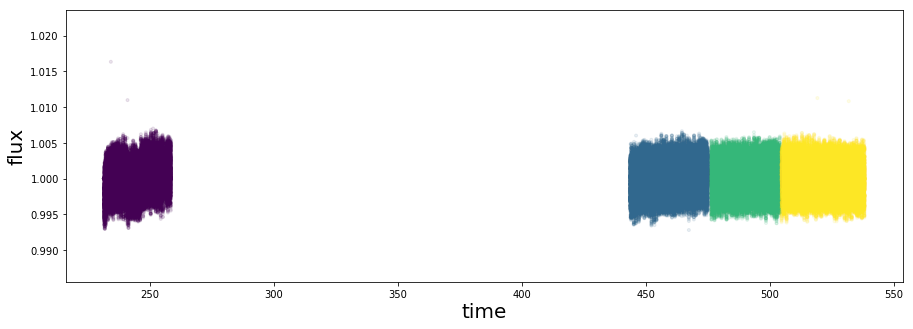

In [5]:
plt.figure(figsize=(15,5))
plt.scatter(time, flux, marker=".", alpha=0.1, c=quarter)
plt.xlabel("time",fontsize=20)
plt.ylabel("flux",fontsize=20)
plt.show()

In [6]:
print((time[3] - time[2])*24.*60)

0.9807655576150864


In [7]:
I = quarter == 0
q,y= LombScargle(time[I],flux[I]).autopower()

Text(0.5,1,'All')

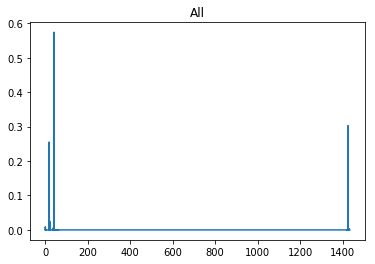

In [57]:
plt.plot(q,y)
plt.title("All")

Text(0.5,1,'Quarter 1 of 4, 18.25-18.40')

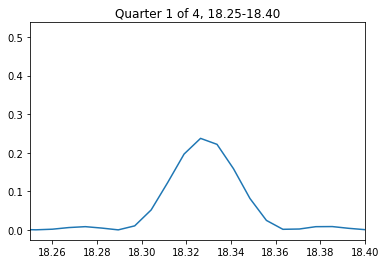

In [8]:
plt.plot(q,y)
plt.xlim(18.25, 18.40)
plt.title("Quarter 1 of 4, 18.25-18.40")

In [9]:
time.shape

(175950,)

In [10]:
fs = np.arange(18.30, 18.36, 0.0001)
amps = np.zeros_like(fs)
for i,f in enumerate(fs):
    vector = np.exp(2. * np.pi * 1j * f * time)
    amp = np.dot(vector, flux)
    amps[i] = amp * amp.conj()

/Users/abs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


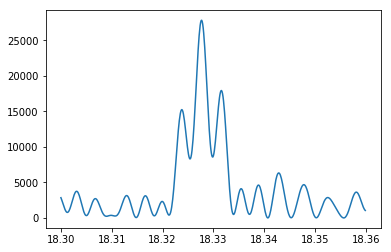

In [11]:
plt.plot(fs, amps)

In [12]:
conttime=[x for x in time if x >= 430]

Text(0.5,1,'Quarter 1 of 4, 18.275-18.375')

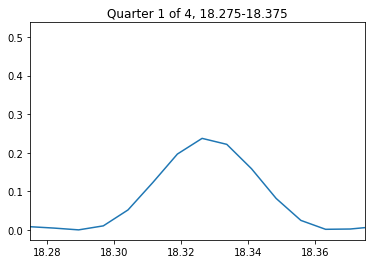

In [13]:
plt.plot(q,y)
plt.xlim(18.275,18.375)
plt.title("Quarter 1 of 4, 18.275-18.375")

Text(0.5,1,'Quarter 1 of 4, 41.5-41.65')

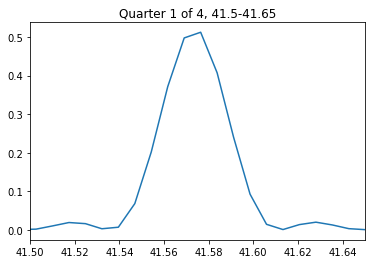

In [14]:
plt.plot(q,y)
plt.xlim(41.5,41.65)
plt.title("Quarter 1 of 4, 41.5-41.65")

Text(0.5,1,'Quarter 1 of 4, 19.765-19.785')

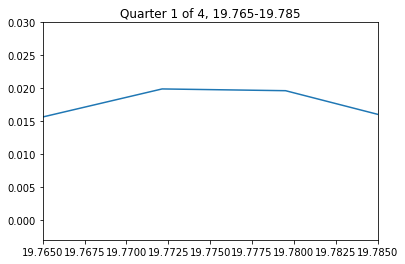

In [15]:
plt.plot(q,y)
plt.xlim(19.765,19.785)
plt.ylim(-0.003, 0.03)
plt.title("Quarter 1 of 4, 19.765-19.785")

Text(0.5,1,'Quarter 1 of 4, 1426.47 to 1426.7')

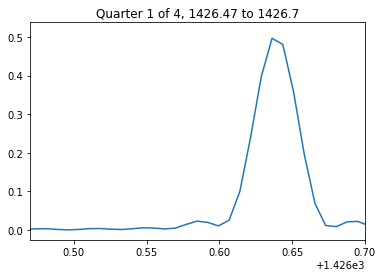

In [16]:
plt.plot(q,y)
plt.xlim(1426.47,1426.7)
plt.title("Quarter 1 of 4, 1426.47 to 1426.7")

In [17]:
I = quarter > 0
q,y= LombScargle(time[I],flux[I]).autopower()

Text(0.5,1,'Quarter 2,3,4 18.275 to 18.375')

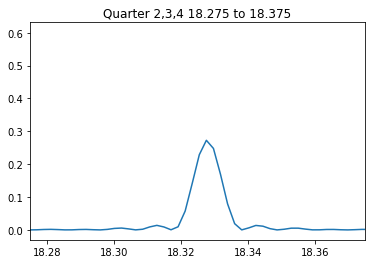

In [18]:
plt.plot(q,y)
plt.xlim(18.275,18.375)
plt.title("Quarter 2,3,4 18.275 to 18.375")

Text(0.5,1,'Quarter 2,3,4 of 4, 41.5 to 41.65')

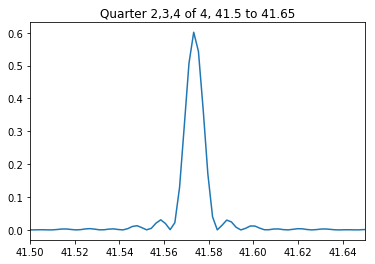

In [19]:
plt.plot(q,y)
plt.xlim(41.5,41.65)
plt.title("Quarter 2,3,4 of 4, 41.5 to 41.65")

Text(0.5,1,'Quarter 2,3,4 of 4, 19.765 to 19.785')

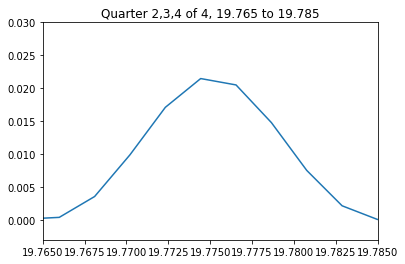

In [20]:
plt.plot(q,y)
plt.xlim(19.765,19.785)
plt.ylim(-0.003, 0.03)
plt.title("Quarter 2,3,4 of 4, 19.765 to 19.785")

Text(0.5,1,'Quarter 2,3,4 of 4, 1426.47 to 1426.7')

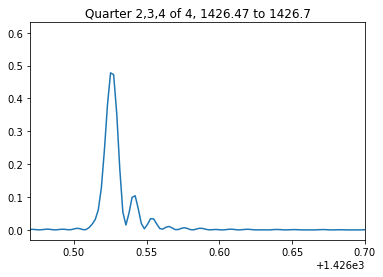

In [21]:
plt.plot(q,y)
plt.xlim(1426.47,1426.7)
plt.title("Quarter 2,3,4 of 4, 1426.47 to 1426.7")

In [22]:
q,y= LombScargle(time,flux).autopower()

Text(0.5,1,'All Quarters, 18.275 to 18.375')

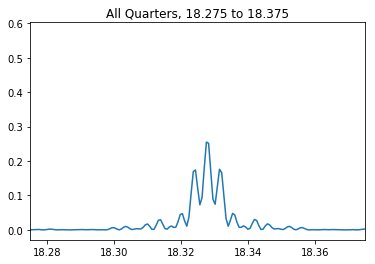

In [23]:
plt.plot(q,y)
plt.xlim(18.275,18.375)
plt.title("All Quarters, 18.275 to 18.375")

Text(0.5,1,'All Quarters, 41.5 to 41.65')

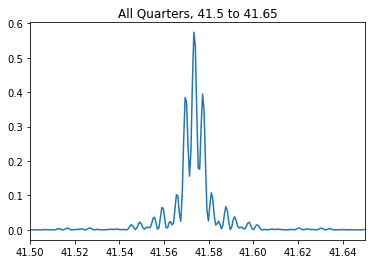

In [24]:
plt.plot(q,y)
plt.xlim(41.5,41.65)
plt.title("All Quarters, 41.5 to 41.65")

Text(0.5,1,'All Quarters, 19.765 to 19.785')

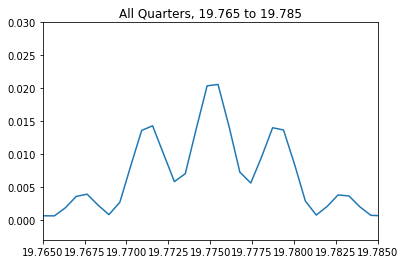

In [25]:
plt.plot(q,y)
plt.xlim(19.765,19.785)
plt.ylim(-0.003, 0.03)
plt.title("All Quarters, 19.765 to 19.785")

Text(0.5,1,'All Quarters, 1426.47 to 1426.7')

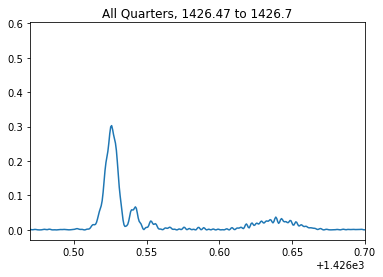

In [26]:
plt.plot(q,y)
plt.xlim(1426.47,1426.7)
plt.title("All Quarters, 1426.47 to 1426.7")

In [51]:
#LombScargle measures frequency in cycles per unit time
#horizontal axis represents frequency in cycles per day
#d is days
#notable frequencies are ~ 18.325, ~41.57, ~19.775, ~1426.64
bandwidth=.2 # inverse days
f0=18.325

In [52]:
fA=f0-bandwidth
fB=f0+bandwidth

In [53]:
print (fA)
print (fB)

18.125
18.525


In [55]:
Ua=np.exp(2*np.pi*fA*time)
Ub=np.exp(2*np.pi*fB*time)
#fA.shape and fB.shape don't equal time.shape, used 1/q instead?
#np.float128 vs 64 (for e)

/Users/abs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
/Users/abs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [56]:
print (Ua)
print (Ub)

[inf inf inf ... inf inf inf]
[inf inf inf ... inf inf inf]
